# Reuters

*Дано:* 8982 обучающих и 2246 контрольных примеров.    
*Выполнить:* многоклассовую классификацию на 46 классов.

In [1]:
from keras.datasets import reuters

Using TensorFlow backend.


### Предобработка данных

In [2]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)   # 10000 наиболее частых слов

In [4]:
import numpy as np

# Декодирование областей обратно в текст

# word_index - это словарь, отображающий слова в целочисленные индексы
word_index = reuters.get_word_index()
# Получить обратное представление словаря, отображающее индексы в слова
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# Декодирование отзыва. Индексы смещены на 3, тк. индексы 0,1,2 зарезеривированы для служебных слов*
decoded_newswire = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])

# *служебные слова: отступ (padding), начало последовательности (start_of_sequence), неизвестно (unknown)

# Векторизуем метки
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [5]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    """Векторизуем последовательности целых чисел в бинарную матрицу (тензор)"""
    
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)   # векторизованные обучающие данные
x_test = vectorize_sequences(test_data)   # векторизованные контрольные данные

In [6]:
# Для кодирования применяется One-hot encoding.
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

### Определение модели

In [7]:
from keras import models
from keras import layers

model = models.Sequential()

# Используется 64-мерное пространство для классификации на 46 классов.
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))

# Для каждого образца сеть выдаст 46-мерный вектор. Каждый элемент этого вектора представляет собой отдельный выходной класс
# softmax будет выводить вероятности по 46 классам. Сумма 46 элементов будет равна 1.
model.add(layers.Dense(46, activation='softmax'))

### Компиляция модели

In [8]:
from keras import losses
from keras import metrics

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

### Создание проверочного набора

In [16]:
# Создание проверочного набора
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

### Обучение модели

In [17]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 3s 424us/step - loss: 0.0731 - acc: 0.9808 - val_loss: 0.0514 - val_acc: 0.9856
Epoch 2/20
7982/7982 [==============================] - 1s 175us/step - loss: 0.0440 - acc: 0.9883 - val_loss: 0.0411 - val_acc: 0.9892
Epoch 3/20
7982/7982 [==============================] - 1s 181us/step - loss: 0.0344 - acc: 0.9908 - val_loss: 0.0366 - val_acc: 0.9904
Epoch 4/20
7982/7982 [==============================] - 1s 172us/step - loss: 0.0283 - acc: 0.9922 - val_loss: 0.0347 - val_acc: 0.9908
Epoch 5/20
7982/7982 [==============================] - 1s 166us/step - loss: 0.0236 - acc: 0.9933 - val_loss: 0.0321 - val_acc: 0.9910
Epoch 6/20
7982/7982 [==============================] - 1s 182us/step - loss: 0.0198 - acc: 0.9943 - val_loss: 0.0311 - val_acc: 0.9917
Epoch 7/20
7982/7982 [==============================] - 1s 176us/step - loss: 0.0167 - acc: 0.9951 - val_loss: 0.0306 - val_acc: 0.9917


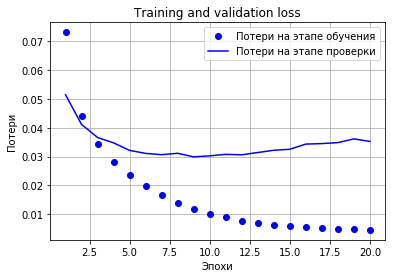

In [24]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, 20+1) # Количество эпох = 20

plt.plot(epochs, loss_values, 'bo', label='Потери на этапе обучения')
plt.plot(epochs, val_loss_values, 'b', label='Потери на этапе проверки')
plt.title('Training and validation loss')
plt.legend()
plt.grid()
plt.xlabel('Эпохи')
plt.ylabel('Потери')
plt.show()

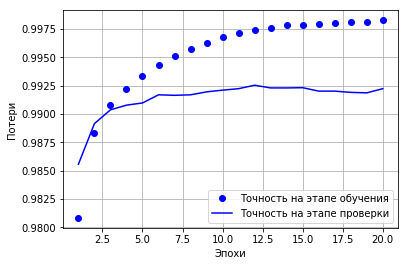

In [23]:
plt.clf()   # Очистить рисунок
history_dict = history.history
acc_values = history_dict['acc']   # значения точности
val_acc_values = history_dict['val_acc']
plt.plot(epochs, acc_values, 'bo', label='Точность на этапе обучения')
plt.plot(epochs, val_acc_values, 'b', label='Точность на этапе проверки')
plt.grid()
plt.xlabel('Эпохи')
plt.ylabel('Потери')
plt.legend()


In [26]:
results = model.evaluate(x_test, one_hot_test_labels)

2246/2246 [==============================] - 0s 217us/step


In [28]:
results

[0.0399503290507269, 0.9911243426725468]

In [29]:
model.predict(x_test)

array([[1.3860277e-06, 2.2159691e-06, 1.3457884e-08, ..., 1.8969901e-08,
        9.4433910e-09, 4.2851922e-09],
       [1.7812637e-03, 1.4198900e-02, 5.4751185e-06, ..., 6.0123386e-07,
        1.3284481e-08, 2.2878739e-04],
       [1.7569590e-02, 8.2410026e-01, 1.0929940e-03, ..., 2.0902133e-05,
        5.9367530e-06, 2.8291473e-04],
       ...,
       [2.4852969e-07, 1.6520672e-06, 6.9302033e-08, ..., 5.2811751e-09,
        3.2355498e-08, 2.7540152e-09],
       [3.1158314e-03, 2.4208133e-01, 8.7350368e-04, ..., 2.5117182e-04,
        6.1874084e-06, 1.2291784e-05],
       [8.3824394e-05, 6.2386227e-01, 3.2319512e-02, ..., 7.7312990e-07,
        8.1168858e-09, 8.0454256e-06]], dtype=float32)